# 第5章 機械学習を用いた因果推論

#### ・本章では、非線形で変数間に相互作用のある因果関係における処置の効果の推定手法に関して、機械学習を用いた因果推論について取り扱う .

## 5-1 ランダムフォレストによる分類と回帰のしくみ

## 決定木による分類

#### ・決定木分析 : データを基に決定木と呼ばれる樹形図を作成し、分析を行う方法のこと .

#### ・今回構築したいモデルは、とある「iさん」が[テレビCMを見た]かどうか、すなわち処置を受けたかどうかを示す値$Z^i$が0なのか1なのかを分類予測する機械学習モデル .

#### これは第4章で解説した傾向スコアを求めるロジスティック回帰の代替となる .

#### ・予測したい変数$Z$を目的変数、もしくは被説明変数と呼び、今回予測に使用するのは年齢変数$x_1$と性別変数$x_2$とする .

#### この予測に使用する変数を特徴量、もしくは説明変数と呼ぶ .

#### ・決定木では図5.1.1のような「説明変数の値に対する条件式」を構築し、各データがその条件式に対して、YesなのかNoなのかに応じて分岐させる .

#### この条件式での判定、分岐を繰り返し、最後に変数$Z$が1なのか0なのかを決定する .

#### 分岐させた先を「ノード」という .

#### ・図5.1.1のように、決定木はif文の連続で記載されるルールベースの手法となる .　ただし、この条件式のルールを作成する際に工夫が行われる .

![alt text](pict1.png)

#### ・分類の決定木において条件式を作成するにあたり、「ジニ不純度」と呼ばれる指標を使用する .　ジニ不純度$I(t)$を式で表すと、

$$
I(t) = 1 - \sum_{l=0}^{c} P(l \mid t)^2
$$ 

#### となる。$l$はとあるラベルを表し、ここでは$Z = 0$ か $Z = 1$のどちらかである .

#### $C$はラベル$l$の総種類数(すなわちクラス数)を示し、テレビCMの視聴のケースではクラス数は2となる .

#### $P(l|t)$はノード$t$にあるデータがラベル$l$である確率、すなわちデータの割合を示す .

#### ・仮に1つの条件式で$Z = 0$ と $Z = 1$が完全に分離できていると、ノード$t$(条件式でYesのノードとNoのノードの2つ)のジニ不純度はともに0となる .

#### ・ジニ不純度の導入は、できるだけ訓練データが変数$Z$で分離できている状態(すなわち純度が高い状態)を目指すために行う .

#### 一番純度が高くなる条件式とは、その条件式1つで訓練データのすべてが$Z = 0$ と $Z = 1$に分離できる条件式のこと . 

#### しかし、そのような条件式は実際には構築できないので、1つの条件式で分離した際に、Yesのノードに分岐されたデータたちと、Noのノードに分岐されたデータたちには、$Z^i=0$と$Z^i=1$が混ざり合う .

#### できるだけ混ざり方が少ないほうが良く、混ざり具合を数値化したものがジニ不純度である .

#### ・とある条件式で得られる、条件式YesのノードとNoのノードのジニ不純度具合を足したものを、その条件式での情報利得(IG : Information Gain)と呼び、

$$
IG(D) = I(D) - \frac{N_{\text{yes}}}{N_d} I(D_{\text{yes}}) - \frac{N_{\text{no}}}{N_d} I(D_{\text{no}})
$$

#### と記載される .　パラメータの説明に関しては以下の通りである .

#### $D$ : 条件式で分岐させたいデータ全て .
#### ${N_d}$ : 条件式で分岐させたいデータ全ての総数 .
#### ${N_{\text{yes}}}$ : 条件式でYesと分岐されたデータ数 .
#### ${N_{\text{no}}}$ : 条件式でNoと分岐されたデータ数 .
#### $I(D_{\text{yes}})$ : Yesと分岐されたデータ${D_{\text{yes}}}$のジニ不純度 .
#### $I(D_{\text{no}})$ : Noと分岐されたデータ${D_{\text{no}}}$のジニ不純度 .

#### ・この情報利得IGが最大となる、すなわち「条件分岐前の不純度」と、「条件分岐後の2つのノードの不純度の合計」の差が最大となる条件式を求める .

#### ・条件式を構築する際には使用する特徴量を決定し、条件式に使用する基準値は特徴量がカテゴリカル変数であれば、各カテゴリー値(例 : 性別だと女性0、男性1)を使用する .

#### 特徴量が連続値の場合、分岐条件の基準値は無限に存在するので、分岐させたい対象のデータの値を使用する .

#### 例えば年齢変数$x_1$において、データが5人分存在し、$(x_1^0,x_1^1,x_1^2,x_1^3,x_1^4)=(20,30,40,25,54)$であった場合には、20,30,40,25,54を基準にそれぞれ条件式を組み立てて、情報利得の大きさを確かめ、最適な基準値を決める .

#### ・決定木による分類では、分類の条件式をどれだけ繰り返すように組み立てるかを、ハイパーパラメータとして事前に決めておく .

#### 今回使用するscikit-learnの場合はmax_depthというハイパーパラメータで設定される .

#### デフォルトではmax_depthはNoneに設定されるため、デフォルトの決定木はどんどん深くなっていく .

#### 止まるのは各ノードにおいて条件式でデータを分岐させた際に$Z=0$と$Z=1$にデータが完全に分離された場合のみ .

#### ・ハイパーパラメータのmax_depthがNoneの場合どんどん条件式のノードが増え、木が深くなり学習に使用した訓練データに強く依存したモデルになりやすい .

#### すると、新たに予測したいデータに対しては良い性能が出ない「過学習したモデル」になってしまう .

#### ・その対策として、機械学習ではデータを訓練データと検証データに分離し、max_depthなどのハイパーパラメータを数種類設定した決定木を訓練データで構築し、検証データで各ハイパーパラメータの結果を比較し、最も良いハイパーパラメータのモデルを採用する .

#### 実際の機械学習の運用ではさらにテストデータも用意し、報告用に使用する .

#### ・基本的にランダムフォレスト、そして決定木ではmax_depthを変えて良いモデルを構築するケースが多い .

#### ・決定木による分類を実装する .　データは第4章と同じくテレビCM効果の疑似データを作成して使用する .　特徴量(説明変数)は年齢変数$x_1$と性別変数$x_2$とする .　目的変数はテレビCMを見たかどうかを示す$Z$である .

### プログラム実行前の設定など

In [101]:
# 乱数のシードを設定
import random
import numpy as np

np.random.seed(1234)
random.seed(1234)

In [102]:
# 使用するパッケージ（ライブラリと関数）を定義
# 標準正規分布の生成用
from numpy.random import *

# グラフの描画用
import matplotlib.pyplot as plt

# SciPy 平均0、分散1に正規化（標準化）関数
import scipy.stats

# シグモイド関数をimport
from scipy.special import expit

# その他
import pandas as pd

### データの作成

In [103]:
# データ数
num_data = 200

# 年齢
x_1 = randint(15, 76, num_data)  # 15から75歳の一様乱数

# 性別（0を女性、1を男性とします）
x_2 = randint(0, 2, num_data)  # 0か1の乱数

### テレビCMを見たかどうか

In [104]:
# ノイズの生成
e_z = randn(num_data)

# シグモイド関数に入れる部分
z_base = x_1 + (1-x_2)*10 - 40 + 5*e_z

# シグモイド関数を計算
z_prob = expit(0.1*z_base)

# テレビCMを見たかどうかの変数（0は見ていない、1は見た）
Z = np.array([])

for i in range(num_data):
    Z_i = np.random.choice(2, size=1, p=[1-z_prob[i], z_prob[i]])[0]
    Z = np.append(Z, Z_i)

### 購入量$Y$の作成

In [105]:
# ノイズの生成
e_y = randn(num_data)

Y = -x_1 + 30*x_2 + 10*Z + 80 + 10*e_y

### データをまとめた表を作成し、平均値を比べる

In [106]:
df = pd.DataFrame({'年齢': x_1,
                   '性別': x_2,
                   'CMを見た': Z,
                   '購入量': Y,
                   })

# 先頭を表示
df.head()

,年齢,性別,CMを見た,購入量
0,62,0,1.0,24.464285
1,34,0,0.0,45.693411
2,53,1,1.0,64.998281
3,68,1,1.0,47.186898
4,27,1,0.0,100.114260


In [107]:
# 平均値を比べる

print(df[df["CMを見た"] == 1.0].mean())
print("--------")
print(df[df["CMを見た"] == 0.0].mean())

年齢       55.836066
性別        0.483607
CMを見た     1.000000
購入量      49.711478
dtype: float64
--------
年齢       32.141026
性別        0.692308
CMを見た     0.000000
購入量      68.827143
dtype: float64


### 決定木でCMを見たかどうかを分類予測するモデルの構築

In [108]:
# scikit-learnから決定木の分類をimport
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier

# データを訓練と検証に分割する
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split


# 説明変数
X = df[["年齢", "性別"]]

# 被説明変数（目的変数）
Z = df["CMを見た"]

# データを訓練と検証に分割
X_train, X_val, Z_train, Z_val = train_test_split(
    X, Z, train_size=0.6, random_state=0)

# 学習と性能確認
clf = DecisionTreeClassifier(max_depth=1, random_state=0)
clf.fit(X_train, Z_train)
print("深さ1の性能：", clf.score(X_val, Z_val))  # 正解率を表示

# 学習と性能確認
clf = DecisionTreeClassifier(max_depth=2, random_state=0)
clf.fit(X_train, Z_train)
print("深さ2の性能：", clf.score(X_val, Z_val))  # 正解率を表示

# 学習と性能確認
clf = DecisionTreeClassifier(max_depth=3, random_state=0)
clf.fit(X_train, Z_train)
print("深さ3の性能：", clf.score(X_val, Z_val))  # 正解率を表示

深さ1の性能： 0.85
深さ2の性能： 0.85
深さ3の性能： 0.825


#### ・ハイパーパラメータとして深さを変化させている .　今回は深さ3にすると、検証データに対する正解率が低下しているので、深さは2が良いとなる .

## 決定木による回帰

#### ・決定木による回帰について、これは第4章のテレビCM効果の疑似ケースでは、線形回帰で商品の購買量を推定する部分に対応する .

#### ・回帰の決定木も基本的な仕組みは分類のときと同じだが、条件式を作る際の情報利得IGにジニ不純度ではなく、二乗誤差を利用する .

#### ・二乗誤差の計算に利用する推定値には条件式で分類されたデータの平均値を利用する .

#### すなわち、各ノードにおいてまず条件式を作り、Yes , Noの2つのグループに分ける .　ここで、変数${N_{\text{yes}}}$は条件式でYesと分岐されたデータ数、${N_{\text{no}}}$はNoと分岐されたデータ数とする .

#### 回帰して求めたい変数を$Y$とすると、Yes側の推定値$\hat{Y}_{yes}$は、

$$
\hat{Y}_{\text{yes}} = \mathbb{E}[Y_{\text{yes}}] = \frac{1}{N_{\text{yes}}} \sum_{i}^{N_{\text{yes}}} Y_{\text{yes}}^{i}
$$

#### となる .　同様にして、$\hat{Y}_{no}$は

$$
\hat{Y}_{\text{no}} = \mathbb{E}[Y_{\text{no}}] = \frac{1}{N_{\text{no}}} \sum_{i}^{N_{\text{no}}} Y_{\text{no}}^{i}
$$

#### となる .　そして、これらの推定値に対する二乗誤差の合計は

$$
\frac{1}{N_{\text{yes}}} \sum_{i}^{N_{\text{yes}}} \left( Y_{\text{yes}}^i - \hat{Y}_{\text{yes}} \right)^2 
+ \frac{1}{N_{\text{no}}} \sum_{i}^{N_{\text{no}}} \left( Y_{\text{no}}^i - \hat{Y}_{\text{no}} \right)^2
$$

#### となる .

#### ・この2乗誤差の合計が最小となるように、条件式に使用する特徴量を選択し、条件の基準値を決定する .

#### ・回帰の決定木もハイパーパラメータmax_depthを指定しない場合、条件式で分割した際に分岐した先のノードのデータ数が1つになるまで条件式を作るため、深い木が作成される .

#### そのため、分類のときと同様に、訓練データと検証データから過学習にならないようにハイパーパラメータmax_depthを比較し、最適な深さを決定して使用する .

### 決定木で購入量を回帰予測するモデルの構築

In [109]:
# scikit-learnから決定木の回帰をimport
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# データを訓練と検証に分割する
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split


# 説明変数
X = df[["年齢", "性別"]]

# 被説明変数（目的変数）
Y = df["購入量"]

# データを訓練と検証に分割
X_train, X_val, Y_train, Y_val = train_test_split(
    X, Y, train_size=0.6, random_state=0)

# 学習と性能確認
reg = DecisionTreeRegressor(max_depth=2, random_state=0)
reg = reg.fit(X_train, Y_train)
print("深さ2の性能：", reg.score(X_val, Y_val))  # 決定係数R2を表示

# 学習と性能確認
reg = DecisionTreeRegressor(max_depth=3, random_state=0)
reg = reg.fit(X_train, Y_train)
print("深さ3の性能：", reg.score(X_val, Y_val))  # 決定係数R2を表示

# 学習と性能確認
reg = DecisionTreeRegressor(max_depth=4, random_state=0)
reg = reg.fit(X_train, Y_train)
print("深さ4の性能：", reg.score(X_val, Y_val))  # 決定係数R2を表示

深さ2の性能： 0.7257496664596153
深さ3の性能： 0.7399348963931736
深さ4の性能： 0.7165539691159017


#### ・深さ3で最も大きな値となっている .　実装コードにおいて、reg.scoreで求めた値は決定係数と呼ばれ、値が大きいほど良いモデルである指標である .

#### 0から1の値をとり、完璧に回帰モデルで推定できていれば1になる .　この結果から深さ3の決定木を使用する .

## ランダムフォレストによる分類

#### ・ランダムフォレスト : 2種類のランダム性を持たせた決定木を複数作成し、それらの総合的な結果から分類や回帰を実施する機械学習モデル .

#### ・2種類のランダム性とは、訓練データのランダム性と、分岐条件に使用する特徴量のランダム性である .

#### ・訓練データのランダム性では、訓練データをそのまま使用するのではなく、訓練データと同じ数だけデータをランダムに抽出したもの訓練データとする .

#### そのため、ランダム抽出して作成した訓練データには重複したデータが存在する .　その代わりに元の1つの訓練データセットから少し異なる訓練データのセットを複数用意することができる .

#### ・分岐条件に使用する特徴量のランダム性とは、分岐条件を作成する際に使用できる特徴量をランダムに複数個選択する .　その結果、分岐条件の作成で使える特徴量が減る .

#### この限られた特徴量を使用して一番良い分岐条件を作成する .

#### 本書で使用しているscikit-learnの場合、特徴量の総数のルート($√$)の数だけ特徴量を選択して、その中での最も良い分岐条件を作成する .

#### ただし、特徴量は重複しないように選ぶ .

#### ・分岐条件で使用できる特徴量を減らすので、モデルの性能は決定木のときよりも悪化する .

#### ランダムフォレストの1つの決定木の性能は悪化しているが、複数の決定木を総合的に考えた際には、ランダム性のない決定木よりも良い性能になるのがランダムフォレストの特徴である .

#### このような複数のモデルを総合的に考える機械学習手法は"アンサンブル手法"と呼ばれる .

#### ・scikit-learnのランダムフォレストはデフォルトでは100個の決定木を作成する .　そして、とある入力データを推論する際には100個の決定木の結果を多数決して、分類ラベルを決める .

#### ・多数決をする際にはその決定木の最終ノードのラベルの割合を考慮する .

#### すなわち、とあるデータを推論する際に決定木をたどって行って最終にたどり着いたノードにデータが10個含まれているとする .　

#### その訓練データは$Z=0$が8個、$Z=1$が2個だった場合、その決定木での推論結果は$Z=0$、そして$Z=0$の確率は80%とする .

#### そして全体投票の際には0.8票が$Z=0$に投票される .

#### この投票をすべての決定木で実施し、投票の合計から分類結果のラベル、そして分類の確率を求める .

### ランダムフォレストでCMを見たかどうかを分類予測するモデルの構築

In [110]:
# scikit-learnからランダムフォレストの分類をimport
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=randomforest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# 説明変数
X = df[["年齢", "性別"]]

# 被説明変数（目的変数）
Z = df["CMを見た"]

# データを訓練と検証に分割
X_train, X_val, Z_train, Z_val = train_test_split(
    X, Z, train_size=0.6, random_state=0)

# 学習と性能確認
clf = RandomForestClassifier(max_depth=1, random_state=0)
clf.fit(X_train, Z_train)
print("深さ1の性能：", clf.score(X_val, Z_val))  # 正解率を表示

# 学習と性能確認
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, Z_train)
print("深さ2の性能：", clf.score(X_val, Z_val))  # 正解率を表示

# 学習と性能確認
clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(X_train, Z_train)
print("深さ3の性能：", clf.score(X_val, Z_val))  # 正解率を表示

深さ1の性能： 0.775
深さ2の性能： 0.85
深さ3の性能： 0.825


#### ・深さ2のランダムフォレスト分類の検証データでの正解率は85%となった .　なお、今回はたまたま決定木の場合と同じ性能になった .

## ランダムフォレストによる回帰

#### ・本書で使用しているscikit-learnのランダムフォレスト回帰の場合には、分岐条件に使用する特徴量のランダム性は使用せず、すべての特徴量を考慮して分岐条件を求める .

#### 訓練データのランダム性を用いる点は分類と同じである .

#### ・回帰の場合もデフォルトでは100本の決定木を用意する .　回帰の推論結果にはこの100本の決定木の回帰推定の結果の平均値を使用する .

### ランダムフォレストで購入量を回帰予測するモデルの構築

In [111]:
# scikit-learnから決定木の回帰をimport
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html?highlight=randomforest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


# 説明変数
X = df[["年齢", "性別"]]

# 被説明変数（目的変数）
Y = df["購入量"]

# データを訓練と検証に分割
X_train, X_val, Y_train, Y_val = train_test_split(
    X, Y, train_size=0.6, random_state=0)

# 学習と性能確認
reg = RandomForestRegressor(max_depth=2, random_state=0)
reg = reg.fit(X_train, Y_train)
print("深さ2の性能：", reg.score(X_val, Y_val))  # 決定係数R2を表示

# 学習と性能確認
reg = RandomForestRegressor(max_depth=3, random_state=0)
reg = reg.fit(X_train, Y_train)
print("深さ3の性能：", reg.score(X_val, Y_val))  # 決定係数R2を表示

# 学習と性能確認
reg = RandomForestRegressor(max_depth=4, random_state=0)
reg = reg.fit(X_train, Y_train)
print("深さ4の性能：", reg.score(X_val, Y_val))  # 決定係数R2を表示

深さ2の性能： 0.7618786062003249
深さ3の性能： 0.7810610687821997
深さ4の性能： 0.7655149049335737


#### ・深さ3のランダムフォレスト回帰の検証データでの決定係数は約0.78となった .　決定木の決定係数が約0.74だったので、ランダムフォレストの方がより良い回帰モデルが構築できた .

## 5-2 Meta-Learners(T-Learner,S-Learner,X-Learner)の実装

#### ・本節では、処置の効果が複雑なケース、例えばテレビCMの視聴による購買促進効果が年齢によって変化する、性別によって異なる、などのケースを取り扱う .

#### ・第4章の回帰分析、IPTW法、DR法は線形な関係のみを想定していたが、本節からは非線形な因果関係および処置効果を扱える因果推論手法を解説、実装する .

## データの準備

#### ・本節ではMeta-learnersを取り扱うにあたり、第1章から紹介している、「上司向け : 部下とのキャリア面談のポイント研修」を疑似ケースに使用する .　本章からはデータの生成方法が異なる .

### プログラム実行前の設定など

In [112]:
# 乱数のシードを設定
import random
import numpy as np

np.random.seed(1234)
random.seed(1234)

In [113]:
# 使用するパッケージ（ライブラリと関数）を定義
# 標準正規分布の生成用
from numpy.random import *

# グラフの描画用
import matplotlib.pyplot as plt

# SciPy 平均0、分散1に正規化（標準化）関数
import scipy.stats

# シグモイド関数をimport
from scipy.special import expit

# その他
import pandas as pd

#### ・次にデータを作成する .　因果ダイアグラム(DAG)を再喝する .

![alt text](pict2.png)

#### ・現実世界において、変数$x$である[上司の部下育成の熱心さ]をどう測定するのかは難しい問題である .　この点については本節の最後に述べる .

#### ひとまず実装においては、変数$x$は-1から1の一様分布に従うとする .

#### ・上司が[「上司向け : 部下とのキャリア面談のポイント研修」を受講]を示す変数$Z$は、変数$x$に従うロジスティック関数で決まるとし、変数$Z=1$となる確率$Z_{prob}$を、

$$
Z_{\text{prob}} = \text{sigmoid}(5.0x + 5.0 \times \text{noise})
$$

#### とする .　この$Z_{prob}$の確率に従い、$Z$が1か0になる .

#### ・最後に、上司が研修を受けた際に、[部下の面談の満足度]変数$Y$は、[上司の部下育成の熱心さ]変数$x$が0より小さいと効果が低く、満足度$Y$は0.5だけ上昇する .

#### [上司の部下育成の熱心さ]変数$x$が0以上で0.5より小さいと、満足度$Y$は0.7上昇する .

#### [上司の部下育成の熱心さ]変数$x$が0.5以上だと満足度$Y$は1.0上昇するとする .

#### すなわち、処置効果が変数$x$によって非線形に変化する状況とする .　部下育成に熱心な上司ほど、同じ研修でもその効果が大きいというのはまずまず妥当な状況である .

#### ・つまり、[上司の部下育成の熱心さ]変数$x$は研修を受講するか否かにも影響し、処置の効果(研修効果)にも影響する .　ここで処置の効果の大きさを$t(x)$とする .

#### ・これらの内容を踏まえ、[部下の面談の満足度]変数$Y$は、

$$
Y = Z \times t(x) + 0.3 \times x + 2.0 + 0.1 \times \text{noize}
$$

#### で決まるとする .　以上の内容を実装し、出力した結果が図5.2.2となる .

### データの作成

findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Fon

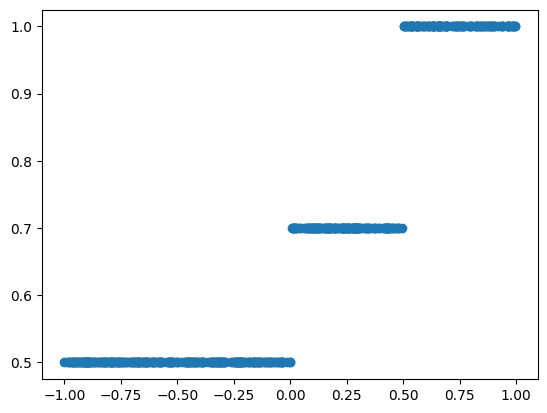

In [115]:
# データ数
num_data = 500

# 部下育成への熱心さ
x = np.random.uniform(low=-1, high=1, size=num_data)  # -1から1の一様乱数

# 上司が「上司向け：部下とのキャリア面談のポイント研修」に参加したかどうか
e_z = randn(num_data)  # ノイズの生成
z_prob = expit(-1*-5.0*x+5*e_z)  # xの効果が反対になっていたのを修正Issue：#18
Z = np.array([])

# 上司が「上司向け：部下とのキャリア面談のポイント研修」に参加したかどうか
for i in range(num_data):
    Z_i = np.random.choice(2, size=1, p=[1-z_prob[i], z_prob[i]])[0]
    Z = np.append(Z, Z_i)

# 介入効果の非線形性：部下育成の熱心さxの値に応じて段階的に変化
t = np.zeros(num_data)
for i in range(num_data):
    if x[i] < 0:
        t[i] = 0.5
    elif x[i] >= 0 and x[i] < 0.5:
        t[i] = 0.7
    elif x[i] >= 0.5:
        t[i] = 1.0

e_y = randn(num_data)
Y = 2.0 + t*Z + 0.3*x + 0.1*e_y 

# 介入効果を図で確認
plt.scatter(x, t, label="treatment-effect")

### データをまとめた表を作成し、可視化する

In [116]:
df = pd.DataFrame({'x': x,
                   'Z': Z,
                   't': t,
                   'Y': Y,
                   })

df.head()  # 先頭を表示

,x,Z,t,Y
0,0.259177,1.0,0.7,2.822658
1,-0.756381,0.0,0.5,1.817917
2,-0.538604,0.0,0.5,1.863401
3,-0.959017,0.0,0.5,1.748676
4,-0.834149,1.0,0.5,2.243528


findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Fon

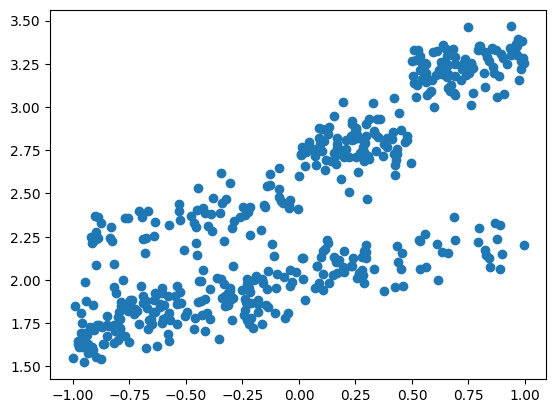

In [117]:
plt.scatter(x, Y)

## T-Learner

#### ・2つの機械学習モデルのこと .

#### ・2つの機械学習モデルとは、介入を受けていない集団($Z^i=0$)と介入を受けた集団($Z^i=1$)のそれぞれについて、満足度$Y^i$を推定する、モデルを作る、ということを意味する .

#### 1つ目のモデルを$M_0$、2つ目のモデルを$M_1$とそれぞれ記載する .

#### ・機械学習モデルの構築について、本書ではランダムフォレストを使用する .

### データを2つに分離する

In [118]:
# 集団を2つに分ける
df_0 = df[df.Z == 0.0]  # 介入を受けていない集団
df_1 = df[df.Z == 1.0]  # 介入を受けた集団

### 満足度$Y^i$を回帰するモデルの学習と構築

In [119]:
# ランダムフォレストモデルを作成
from sklearn.ensemble import RandomForestRegressor

# 介入を受けていないモデル
reg_0 = RandomForestRegressor(max_depth=3)
reg_0.fit(df_0[["x"]], df_0[["Y"]])

# 介入を受けたモデル
reg_1 = RandomForestRegressor(max_depth=3)
reg_1.fit(df_1[["x"]], df_1[["Y"]])

/home/taihei/因果分析ゼミ/myenv/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/taihei/因果分析ゼミ/myenv/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=3)

#### ・本節の実装では説明を簡素化するために、検証用データを作成せずに、適当に木の深さを3に設定している .

#### 本来は木の深さが最適な値となるように、検証用データと訓練データに分割し、比較して決定する .

#### ・次に2つのモデルで各人の処置効果(ITE)を計算し、全員分を平均することで、ATEを求める .

In [120]:
# ATEを求める
mu_0 = reg_0.predict(df[["x"]])
mu_1 = reg_1.predict(df[["x"]])

ATE = (mu_1-mu_0).mean()
print("ATE：", ATE)

ATE： 0.6934822266783499


#### ・続いて処置群における平均処置効果ATTと、対照群における平均処置効果ATUを求める .

#### それぞれの処置効果を求めるのに必要な反実仮想の結果を、構築した回帰モデルから計算する .

In [121]:
# 処置群における平均処置効果ATTと、対照群における平均処置効果ATU
ATT = df_1["Y"] - reg_0.predict(df_1[["x"]])
ATU = reg_1.predict(df_0[["x"]]) - df_0["Y"]

print("ATT：", ATT.mean())
print("ATU：", ATU.mean())

ATT： 0.7767712236644637
ATU： 0.5970719136566836


#### ・最後に、推定された介入効果(仮に介入を受けた場合の効果)を各人ごとに求める .

findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Fon

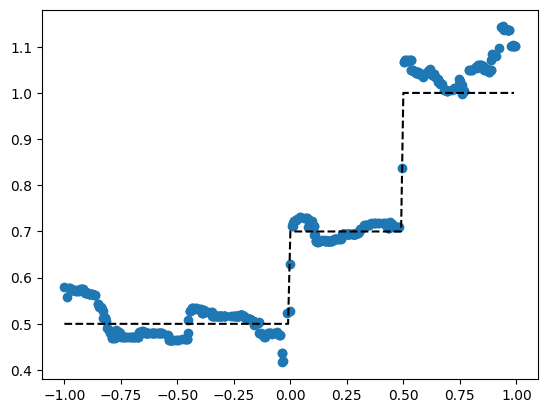

In [122]:
# 推定された治療効果を各人ごとに求めます
t_estimated = reg_1.predict(
    df[["x"]]) - reg_0.predict(df[["x"]])
plt.scatter(df[["x"]], t_estimated,
            label="estimated_treatment-effect")

# 正解のグラフを作成
x_index = np.arange(-1, 1, 0.01)
t_ans = np.zeros(len(x_index))
for i in range(len(x_index)):
    if x_index[i] < 0:
        t_ans[i] = 0.5
    elif x_index[i] >= 0 and x_index[i] < 0.5:
        t_ans[i] = 0.7
    elif x_index[i] >= 0.5:
        t_ans[i] = 1.0

# 正解を描画
plt.plot(x_index, t_ans, color='black', ls='--', label='Baseline')

#### ・上の図を確認すると、[上司の部下育成の熱心さ]変数$x$に応じて、処置の効果(研修効果)が変化するという研修効果をきちんと推定できていることが読み取れる .

#### 図の点線が正解の研修効果で、丸点が各人に対する研修効果(処置効果)の推定結果である .

## S-Learner

#### ・T-Learnerとは異なり、1つのモデルのみを使用する .　そのため、処置を示す変数$Z$もモデルの中に説明変数として使用する .

#### ・今回はランダムフォレストを使用して、S-Learnerを実現する .　S-Learnerの実装もT-Learnerのとき同様に、説明の簡易化のためデータは検証データに分けず、木の深さを適当に4に設定している .

In [123]:
# ランダムフォレストモデルを作成
from sklearn.ensemble import RandomForestRegressor

# モデルを学習
reg = RandomForestRegressor(max_depth=4)
X = df.loc[:, ["x", "Z"]]
reg.fit(X, df[["Y"]])

/home/taihei/因果分析ゼミ/myenv/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=4)

#### ・ATEを計算する .　今回はモデルが1つなので、処置$Z=0$と$1$の場合を1つのモデルから計算して求める .

In [124]:
# 処置が0と1の状態を作成する
X_0 = X.copy()
X_0["Z"] = 0.0

X_1 = X.copy()
X_1["Z"] = 1.0

# ATEの計算
ATE = (reg.predict(X_1)-reg.predict(X_0)).mean()
print("ATE：", ATE)

ATE： 0.6911222919655602


#### ・最後に推定された処置効果を各人ごとに求める .

findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Fon

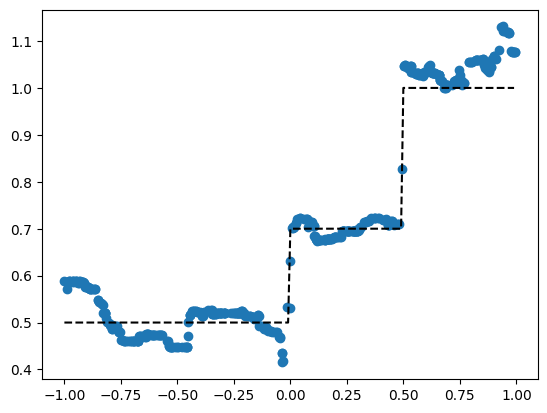

In [125]:
# 推定された治療効果を各人ごとに求めます
t_estimated = reg.predict(X_1)-reg.predict(X_0)
plt.scatter(df[["x"]], t_estimated,
            label="estimated_treatment-effect")

# 正解を描画
plt.plot(x_index, t_ans, color='black', ls='--', label='Baseline')

#### ・結果はT-Learnerとほぼ同じ結果になっている .　[上司の部下育成の熱心さ]変数$x$に応じて、処置の効果(研修効果)が変化するという研修効果をきちんと推定できていることが読み取れる .

## X-Learner

#### ・X-Learnerは傾向スコアを用いて、T-Learnerの結果をさらに補正する手法のこと .

#### ・はじめにT-Learnerで介入を受けていない集団($Z^i=0$)と介入を受けた集団($Z^i=1$)のそれぞれについて、満足度$Y^i$を推定するモデルを作る .

#### 1つ目のモデルを$M_0$、2つ目のモデルを$M_1$と記載する .

#### ・続いて、処置群における平均処置効果ATTと、対照群における平均処置効果ATUを求める .　ここでATTを$\hat{D}_1$,ATUを$\hat{D}_0$とすると、

$$
\begin{aligned}
\hat{D}_0 &= M_1(x_0) - Y_0 \\
\hat{D}_1 &= Y_1 - M_0(x_1)
\end{aligned}
$$

#### となる .　ここで、$x_0$,$x_1$は処置$Z=0$と$Z=1$のそれぞれの集団を示す .

#### ・X-Learnerではここでさらに、$\hat{D}_0$を$x_0$から求めるモデル$M_2$と、$\hat{D}_1$を$x_1$から求めるモデル$M_3$を作成する .

$$
\begin{aligned}
\hat{\tau}_0 &= \hat{D}_0 = M_2(x_0) \\
\hat{\tau}_1 &= \hat{D}_1 = M_3(x_1)
\end{aligned}
$$

#### ・元の$M_0$,$M_1$を使用したATTとATUの推定式は、処置$Z=0$と$Z=1$のそれぞれの集団$x_0$と$x_1$に対してそれぞれATUとATTの片方しか求まらない .

#### そのため全集団$x$に対してもATUを推定できるモデル$M_2$とATTを推定するモデル$M_3$をわざわざ構築している .

#### ・そしてさらに、傾向スコア$P(Z=z|X=x)$を推定するモデルを構築する .　このモデルを$g(x)$と表す .

#### この傾向スコアの値で重み付けて、各人の処置効果(因果の大きさ)の推定値$\hat{\tau}$を、

$$
\hat{\tau} = g(x)\hat{\tau}_0(x) + (1 - g(x))\hat{\tau}_1(x)
$$

#### とする .

#### ・処置$Z=0$になりやすい属性の人($g(x)$が0に近い人)については、$\hat{\tau}_1$の比重を大きくして因果関係を求める .

#### また、処置$Z=1$になりやすい属性の人($g(x)$が1に近い人)については、$\hat{\tau}_0$の比重を大きくして因果効果を求める . 

### ・つまり、自分のデータを使わずに構築されたモデルでの推定結果に重きを置くことで、トータルとしての推定精度を上げたいという気持ちである .

#### ・実装は次の通りである .　まず、T-Learnerで$M_0$と$M_1$を作成する .

In [126]:
# T-LearnerでM0とM1を求める
from sklearn.ensemble import RandomForestRegressor

# 集団を2つに分ける
df_0 = df[df.Z == 0.0]  # 介入を受けていない集団
df_1 = df[df.Z == 1.0]  # 介入を受けた集団

# 介入を受けていないモデル
M0 = RandomForestRegressor(max_depth=3)
M0.fit(df_0[["x"]], df_0[["Y"]])

# 介入を受けたモデル
M1 = RandomForestRegressor(max_depth=3)
M1.fit(df_1[["x"]], df_1[["Y"]])

/home/taihei/因果分析ゼミ/myenv/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/taihei/因果分析ゼミ/myenv/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=3)

#### ・次に$M_2$と$M_3$を作成する .

In [127]:
# 推定された治療効果を各人ごとに求めます
# tau_0 = reg_1.predict(df_0[["x"]]) - df_0["Y"]
# tau_1 = df_1["Y"] - reg_0.predict(df_1[["x"]])

# Issue 38ご指摘で判明：修正（2022/04/11）
tau_0 = M1.predict(df_0[["x"]]) - df_0["Y"]
tau_1 = df_1["Y"] - M0.predict(df_1[["x"]])


# ATTとATUを求めるモデルを作成します
M2 = RandomForestRegressor(max_depth=3)
M2.fit(df_0[["x"]], tau_0)

M3 = RandomForestRegressor(max_depth=3)
M3.fit(df_1[["x"]], tau_1)

RandomForestRegressor(max_depth=3)

#### ・最後に傾向スコアをロジスティック回帰したモデル$g(x)$を推定し、各人の処置効果(因果の大きさ)の推定値$\hat{\tau}$を求める .

In [128]:
# 傾向スコアを求めます
from sklearn.linear_model import LogisticRegression

# 説明変数
X = df[["x"]]

# 被説明変数（目的変数）
Z = df["Z"]

# 回帰の実施
g_x = LogisticRegression().fit(X, Z)
g_x_val = g_x.predict_proba(X)

# それぞれのモデルで全データの効果を予測し、傾向スコアで調整
tau = g_x_val[:, 1]*M2.predict(df[["x"]]) + g_x_val[:, 0]*M3.predict(df[["x"]])

findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.


findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Fon

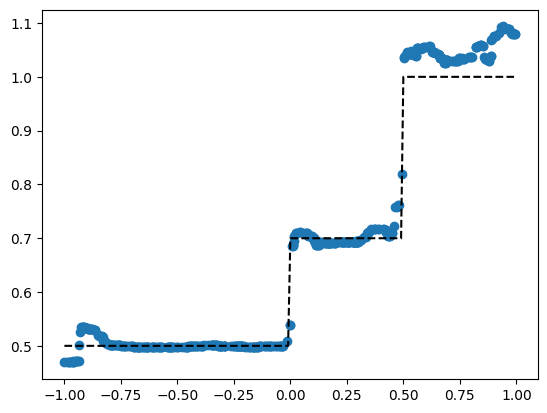

In [129]:
# 推定された治療効果を各人ごとに求めます
plt.scatter(df[["x"]], tau, label="estimated_treatment-effect")

# 正解を描画
plt.plot(x_index, t_ans, color='black', ls='--', label='Baseline')

#### ・上の図を見ると、X-Learnerの方がT-Learnerよりも各人の研修効果の推定値がより正解の点線に収束しており、ばらつきが減っている .

### ・本節では、「上司向け : 部下とのキャリア面談のポイント研修」の効果を因果推論したが、[上司の部下育成の熱心さ]変数$x$をどう測定するのかが困りどころである .

### 例えば、当該上司のそのまた上司が評価する、実際にその上司が部下育成に充てている時間をファクトとして計測するなどが考えられる .

### ・注意するべき点は、今回のケースでは実際に部下から聞くのは良くない点である .

### 部下に尋ねて変数$x$の値を決めるということは、[部下の面談の満足度]変数$Y$から、[上司の部下育成の熱心さ]変数$x$の方向へ因果の矢印が生まれることになる .

#### すると双方向の矢印になり、循環の関係になるので、DAGでなくなる .

### すなわち、部下に「上司は部下育成に熱心ですか？」と聞くと、[部下の面談の満足度]変数$Y$に依存した変数$x$を取得してしまうので、避けるべきである .

## 5-3 Doubly Robust Learningの実装

#### ・Doubly Robust Learning(以後、DR-Learnerと呼ぶ)は、傾向スコアを4.3節のDR法と同じく、反実仮想(潜在的結果変数)の推定に利用し、より性能の高い機械学習モデルを構築する思想である .

#### ・具体的には、上司が研修を受講し$Z=1$である、とある「$i$さん」が処置を受けた場合に、キャリア面談の満足度$Y$,すなわち$Y_1^{i, \mathrm{DR}}$を

$$
Y_1^{i, \mathrm{DR}} = M_1(x^i) + \frac{Y^i - M_1(x^i)}{g(x^i)}
$$

#### とする .　ここで、$M_1$は介入を受けた集団($Z^i=1$)で構築した満足度$Y^i$を推定するモデル、$x^i$は「$i$さん」の属性情報(今回は「$i$さん」の上司の部下育成の熱心度)、そして$g(x)$は$Z^i=1$となる傾向スコアを推定するモデルである .

#### ・この式の気持ちとしては、$Y^i$を$Y^i_1$とみなすには、個別の誤差が乗っているので、それを少しでも緩和したい、というものになる .

#### なお、反実仮想は、$Y_0^{i, \mathrm{DR}} = M_0(x^i)$として求める .　よって、「$i$さん」のITEは

$$
Y_1^{i, \mathrm{DR}} - Y_0^{i, \mathrm{DR}}
$$

#### となる .

#### ・同様に、処置を受けていない人のITEは、$Y_0^{i, \mathrm{DR}}$が

$$
Y_0^{i, \mathrm{DR}} = M_0(x^i) + \frac{Y^i - M_0(x^i)}{1 - g(x^i)}
$$

#### となり、$Y_1^{i, \mathrm{DR}}$は$M_1(x^i)$である .　ITEは$Y_1^{i, \mathrm{DR}} - Y_0^{i, \mathrm{DR}}$となる .

#### ・DR-Learnerではこうして介入を受けた集団($Z^i=1$)で求めたITEと介入を受けていない集団($Z^i=0$)で求めたITEを使用し、$x^i$からITEを推論する1つの機械学習モデル$M_{DR}$を最後に作成して、因果効果を推論する .

## DR-Learnerの実装

#### ・本節では、機械学習モデル$M_0$,$M_1$,$M_{DR}$を全てランダムフォレストで作成することとする .　$M_0$,$M_1$は5.2節で解説したT-Learnerと同じになる .

### プログラム実行前などの設定

In [130]:
# 乱数のシードを設定
import random
import numpy as np

np.random.seed(1234)
random.seed(1234)

In [131]:
# 使用するパッケージ（ライブラリと関数）を定義
# 標準正規分布の生成用
from numpy.random import *

# グラフの描画用
import matplotlib.pyplot as plt

# SciPy 平均0、分散1に正規化（標準化）関数
import scipy.stats

# シグモイド関数をimport
from scipy.special import expit

# その他
import pandas as pd

### データの作成

findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Fon

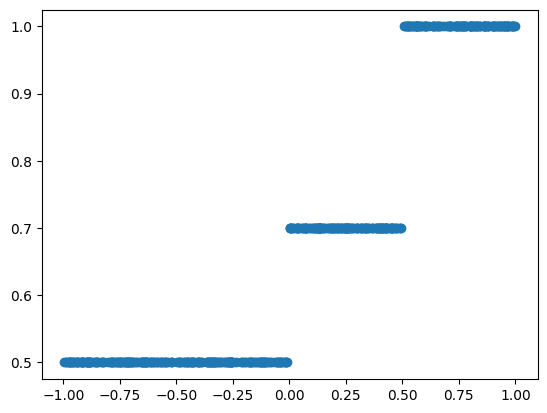

In [132]:
# データ数
num_data = 500

# 部下育成への熱心さ
x = np.random.uniform(low=-1, high=1, size=num_data)  # -1から1の一様乱数

# 上司が「上司向け：部下とのキャリア面談のポイント研修」に参加したかどうか
e_z = randn(num_data)  # ノイズの生成
z_prob = expit(5.0*x+5*e_z)  # xの効果が反対になっていたのを修正Issue：#18
Z = np.array([])

# 上司が「上司向け：部下とのキャリア面談のポイント研修」に参加したかどうか
for i in range(num_data):
    Z_i = np.random.choice(2, size=1, p=[1-z_prob[i], z_prob[i]])[0]
    Z = np.append(Z, Z_i)

# 介入効果の非線形性：部下育成の熱心さxの値に応じて段階的に変化
t = np.zeros(num_data)
for i in range(num_data):
    if x[i] < 0:
        t[i] = 0.5
    elif x[i] >= 0 and x[i] < 0.5:
        t[i] = 0.7
    elif x[i] >= 0.5:
        t[i] = 1.0

e_y = randn(num_data)
Y = 2.0 + t*Z + 0.3*x + 0.1*e_y 

# 介入効果を図で確認
plt.scatter(x, t, label="treatment-effect")

### データをまとめた表を作成し、可視化する

In [133]:
df = pd.DataFrame({'x': x,
                   'Z': Z,
                   't': t,
                   'Y': Y,
                   })

#先頭を表示
df.head()  

,x,Z,t,Y
0,-0.616961,0.0,0.5,1.803183
1,0.244218,1.0,0.7,2.668873
2,-0.124545,0.0,0.5,2.193123
3,0.570717,1.0,1.0,3.245229
4,0.559952,1.0,1.0,3.139868


findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Fon

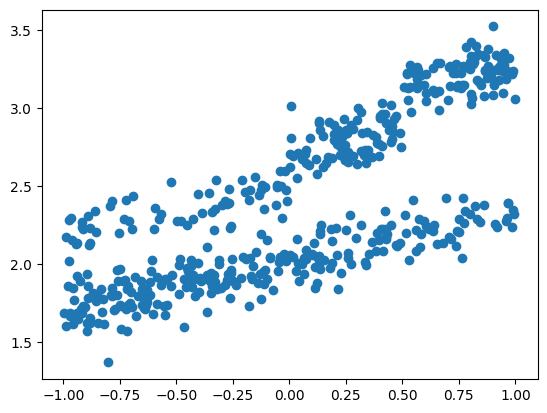

In [134]:
plt.scatter(x, Y)

#### ・まずは、$M_0$,$M_1$を求める .

In [135]:
# ランダムフォレストモデルを作成
from sklearn.ensemble import RandomForestRegressor

# 集団を2つに分ける
df_0 = df[df.Z == 0.0]  # 介入を受けていない集団
df_1 = df[df.Z == 1.0]  # 介入を受けた集団

# 介入を受けていないモデル
M_0 = RandomForestRegressor(max_depth=3)
M_0.fit(df_0[["x"]], df_0[["Y"]])

# 介入を受けたモデル
M_1 = RandomForestRegressor(max_depth=3)
M_1.fit(df_1[["x"]], df_1[["Y"]])

/home/taihei/因果分析ゼミ/myenv/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/taihei/因果分析ゼミ/myenv/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=3)

#### ・次に、傾向スコア(propensity score)を推定する$g(x)$をロジスティック回帰で求める .

In [136]:
# 傾向スコアを求めます
from sklearn.linear_model import LogisticRegression

# 説明変数
X = df[["x"]]

# 被説明変数（目的変数）
Z = df["Z"]

# 回帰の実施
g_x = LogisticRegression().fit(X, Z)
g_x_val = g_x.predict_proba(X)

In [137]:
# 処置群
Y_1 = M_1.predict(df_1[["x"]]) + (df_1["Y"] - M_1.predict(df_1[["x"]])) / \
    g_x.predict_proba(df_1[["x"]])[:, 1]  # [:,1]はZ=1側の確率
df_1["ITE"] = Y_1 - M_0.predict(df_1[["x"]])

# 非処置群
Y_0 = M_0.predict(df_0[["x"]]) + (df_0["Y"] - M_0.predict(df_0[["x"]])) / \
    g_x.predict_proba(df_0[["x"]])[:, 0]  # [:,0]はZ=0側の確率
df_0["ITE"] = M_1.predict(df_0[["x"]]) - Y_0

# 表を結合する
df_DR = pd.concat([df_0, df_1])
df_DR.head()

/tmp/ipykernel_1501657/3022560860.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["ITE"] = Y_1 - M_0.predict(df_1[["x"]])
/tmp/ipykernel_1501657/3022560860.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0["ITE"] = M_1.predict(df_0[["x"]]) - Y_0


,x,Z,t,Y,ITE
0,-0.616961,0.0,0.5,1.803183,0.514193
2,-0.124545,0.0,0.5,2.193123,0.081816
5,-0.454815,0.0,0.5,1.973293,0.333947
6,-0.447071,0.0,0.5,1.953387,0.364890
9,0.751865,0.0,1.0,2.289369,0.776162


#### ・構築した3つのモデルからDoubly Robustに基づいたITEを求める .　そしてITEを求めるモデル$M_{DR}$を作成する .　最後にモデル$M_{DR}$から各人ごとに推定された処置効果を求める .

/home/taihei/因果分析ゼミ/myenv/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Fon

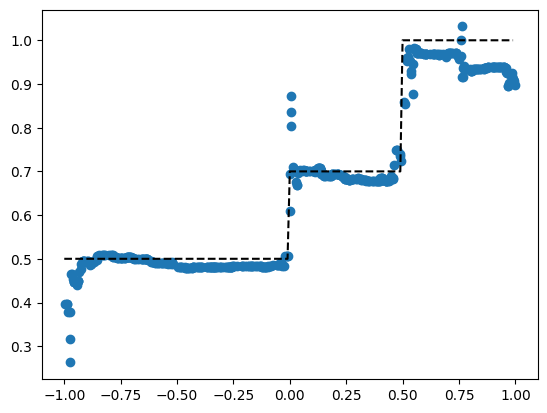

In [138]:
# モデルM_DRを構築し、各人の治療効果をモデルから求める

# モデルM_DR
M_DR = RandomForestRegressor(max_depth=3)
M_DR.fit(df_DR[["x"]], df_DR[["ITE"]])


# 推定された治療効果を各人ごとに求めます
t_estimated = M_DR.predict(df_DR[["x"]])
plt.scatter(df_DR[["x"]], t_estimated,
            label="estimated_treatment-effect")

# 正解のグラフを作成
x_index = np.arange(-1, 1, 0.01)
t_ans = np.zeros(len(x_index))
for i in range(len(x_index)):
    if x_index[i] < 0:
        t_ans[i] = 0.5
    elif x_index[i] >= 0 and x_index[i] < 0.5:
        t_ans[i] = 0.7
    elif x_index[i] >= 0.5:
        t_ans[i] = 1.0


# 正解を描画
plt.plot(x_index, t_ans, color='black', ls='--', label='Baseline')

### ・本節でも解説と実装を簡素化するために、ランダムフォレストのハイパーパラメータmax_depthについては決め打ちで適当に設定している .

### ・本来はデータを訓練データと検証データに分ける、もしくはn-foldクロスバリデーションするなどして、適切なハイパーパラメータを設定した性能の良い(すなわち、検証データでの性能が高く、未知のデータでも性能が高くなりそうな = 汎化性能が高そう)なモデルを構築して使用している .

## 次回

#### ・第6章から『第2部 因果探索』に入る .

#### ・観測したデータの因果関係が自明ではない場合、すなわち、変数間の因果の矢印の方向や有無が分からない状態において、観測データから因果ダイアグラムを求める手法について学ぶ .